<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/Alcohol_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [50]:
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [41]:
# 정규화
# scaler = MinMaxScaler()
# data = scaler.fit_transform(data) # 전체 데이터로 스케일러 학습 : 이는 정보 누출 가능성이 있음

# 원본 데이터를 시간순으로 분할
split_idx = int(len(data) * 0.7)
train_data_raw = data[:split_idx]
test_data_raw = data[split_idx:]

# 그 다음에!! 훈련데이터로만 스케일러 학습
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data_raw)
test_data = scaler.transform(test_data_raw)

def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data)-window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)


In [42]:
# 데이터 분할 (시계열 데이터를 고려하여 순서대로 분할)
train_X, test_X = X[0:train_size], X[train_size:]
train_y, test_y = y[0:train_size], y[train_size:]

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (219, 12, 1) (219, 1)
테스트 데이터의 크기 : (94, 12, 1) (94, 1)


모델

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

# 4. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=8, verbose=1)

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0683
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0081
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0083
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0092
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075
Epoch 16/50
40/40 ━

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


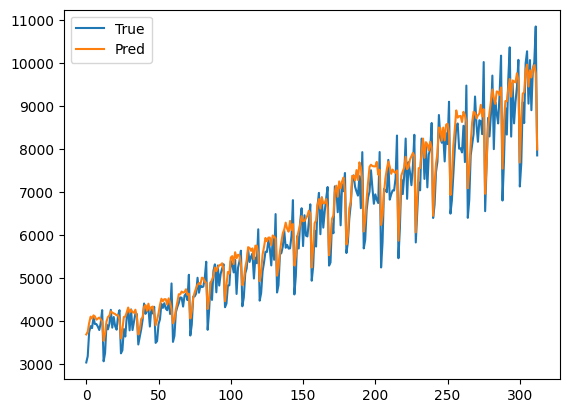

In [44]:
# 5. 예측
pred = model.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

In [47]:
loss = model.evaluate(test_X, test_y, verbose=0)
print("="*30)
# print(f"테스트 데이터 정확도 (Accuracy): {accuracy:.4f}") # 정확도 지표가 없으므로 주석 처리
print(f"테스트 데이터 손실 (Loss): {loss:.4f}")
print("="*30)

테스트 데이터 손실 (Loss): 0.0047


In [48]:
# 테스트 데이터에 대한 예측 수행
test_pred = model.predict(test_X)

# 예측 결과를 원래 스케일로 되돌림
test_y_inv = scaler.inverse_transform(test_y)
test_pred_inv = scaler.inverse_transform(test_pred)

# MAE 및 R-squared 계산
mae = mean_absolute_error(test_y_inv, test_pred_inv)
r2 = r2_score(test_y_inv, test_pred_inv)

print("="*30)
print(f"테스트 데이터 MAE (Mean Absolute Error): {mae:.4f}")
print(f"테스트 데이터 R-squared: {r2:.4f}")
print("="*30)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
테스트 데이터 MAE (Mean Absolute Error): 446.6477
테스트 데이터 R-squared: 0.7371
